In [47]:
import pandas as pd

df = pd.read_csv("routes.csv")
df.head(5)

,city_a,city_a_formatted,city_b,city_b_formatted,distance,color,tunnel,ferry,ferry_count,lat_city_a,long_city_a,lat_city_b,long_city_b
0,Edinburgh,"Edinburgh, Scotland",London,"London, England",4,Blue,0,0,NaN,55.953252,-3.188267,51.507218,-0.127586
1,Edinburgh,"Edinburgh, Scotland",London,"London, England",4,Orange,0,0,NaN,55.953252,-3.188267,51.507218,-0.127586
2,London,"London, England",Dieppe,"Dieppe, France",2,Grey,0,1,1.0,51.507218,-0.127586,49.922992,1.077483
3,London,"London, England",Dieppe,"Dieppe, France",2,Grey,0,1,1.0,51.507218,-0.127586,49.922992,1.077483
4,London,"London, England",Amsterdam,"Amsterdam, Netherlands",2,Grey,0,1,2.0,51.507218,-0.127586,52.367573,4.904139


In [48]:
import networkx as nx
import matplotlib.pyplot as plt

In [49]:
G = nx.from_pandas_edgelist(df, source='city_a', target='city_b', edge_attr=True)
G

# Calculations

In [50]:
nx.shortest_path(G, 'Paris', 'Edinburgh', weight='Distance')


['Paris', 'Dieppe', 'London', 'Edinburgh']

In [51]:
nx.shortest_path_length(G, 'Paris', 'Edinburgh', weight='Distance')

3

In [52]:
df2 = pd.read_csv('tickets.csv')
df2.head()
df2.columns = df2.columns.str.lower().str.replace(' ','_')

routes = df2.to_dict('records') 
#routes

In [53]:
# #nx.shortest_path(G, df['city_a'], df['city_b'], weight='Distance')
# routes = df.to_dict('records') 

shortest_routes = []
for route in routes: 
    try:
        paths = nx.shortest_path(G, route['city_a'], route['city_b'], weight='Distance')
        #shortest_routes.append(paths)
        print(paths)
        shortest_routes.append(paths)
    except: 
        print(f'problem!!')

# city_a = []
# for route in routes:
#     city_a.append(route['city_a'])
# city_a

# city_b = []
# for route in routes: 
#     city_b.append(route['city_b'])
# city_b

# nx.shortest_path(G, city_a[1], city_b[1], weight='Distance')

['Brest', 'Paris', 'Frankfurt', 'Berlin', 'Warszawa', 'Wilno', 'Petrograd']
['Lisboa', 'Madrid', 'Pamplona', 'Paris', 'Frankfurt', 'Berlin', 'Danzic']
['Palermo', 'Smyrna', 'Constantinople', 'Bucuresti', 'Kyiv', 'Kharkov', 'Moskva']
['Kobenhavn', 'Stockholm', 'Petrograd', 'Moskva', 'Kharkov', 'Rostov', 'Sochi', 'Erzurum']
['Edinburgh', 'London', 'Dieppe', 'Paris', 'Marseille', 'Roma', 'Brindisi', 'Athína']
['Cádiz', 'Madrid', 'Pamplona', 'Paris', 'Frankfurt', 'Essen', 'Kobenhavn', 'Stockholm']
['Athína', 'Sofia', 'Bucuresti', 'Kyiv', 'Wilno']
['Frankfurt', 'Berlin', 'Warszawa', 'Kyiv', 'Smolensk']
['Berlin', 'Warszawa', 'Kyiv', 'Kharkov', 'Moskva']
['Amsterdam', 'Essen', 'Berlin', 'Warszawa', 'Wilno']
['Stockholm', 'Petrograd', 'Wilno', 'Warszawa', 'Wien']
['Kyiv', 'Wilno', 'Petrograd']
['Zágráb', 'Venezia', 'Roma', 'Brindisi']
['Warszawa', 'Kyiv', 'Smolensk']
['Zürich', 'Marseille', 'Roma', 'Brindisi']
['Zürich', 'Venezia', 'Zágráb', 'Budapest']
problem!!
['Brest', 'Pamplona', 'Marsei

In [54]:
shortest_routes

[['Brest', 'Paris', 'Frankfurt', 'Berlin', 'Warszawa', 'Wilno', 'Petrograd'],
 ['Lisboa', 'Madrid', 'Pamplona', 'Paris', 'Frankfurt', 'Berlin', 'Danzic'],
 ['Palermo',
  'Smyrna',
  'Constantinople',
  'Bucuresti',
  'Kyiv',
  'Kharkov',
  'Moskva'],
 ['Kobenhavn',
  'Stockholm',
  'Petrograd',
  'Moskva',
  'Kharkov',
  'Rostov',
  'Sochi',
  'Erzurum'],
 ['Edinburgh',
  'London',
  'Dieppe',
  'Paris',
  'Marseille',
  'Roma',
  'Brindisi',
  'Athína'],
 ['Cádiz',
  'Madrid',
  'Pamplona',
  'Paris',
  'Frankfurt',
  'Essen',
  'Kobenhavn',
  'Stockholm'],
 ['Athína', 'Sofia', 'Bucuresti', 'Kyiv', 'Wilno'],
 ['Frankfurt', 'Berlin', 'Warszawa', 'Kyiv', 'Smolensk'],
 ['Berlin', 'Warszawa', 'Kyiv', 'Kharkov', 'Moskva'],
 ['Amsterdam', 'Essen', 'Berlin', 'Warszawa', 'Wilno'],
 ['Stockholm', 'Petrograd', 'Wilno', 'Warszawa', 'Wien'],
 ['Kyiv', 'Wilno', 'Petrograd'],
 ['Zágráb', 'Venezia', 'Roma', 'Brindisi'],
 ['Warszawa', 'Kyiv', 'Smolensk'],
 ['Zürich', 'Marseille', 'Roma', 'Brindisi'],

In [55]:
df['path'] = df.apply(lambda row: nx.shortest_path(G, row['city_a'], row['city_b'], weight='Distance'), axis=1)

#df['path_length'] = df.apply(lambda row: nx.shortest_path_length(G, row['city_a'], row['city_b'], weight='Distance'), axis=1)

df['path']





0       [Edinburgh, London]
1       [Edinburgh, London]
2          [London, Dieppe]
3          [London, Dieppe]
4       [London, Amsterdam]
               ...         
96          [Essen, Berlin]
97       [Zágráb, Budapest]
98       [Zágráb, Sarajevo]
99     [Sarajevo, Budapest]
100       [Paris, Pamplona]
Name: path, Length: 101, dtype: object

# Drawing 

In [56]:
edges = list(G.edges())
colors = [G[u][v]['color'] for u,v in edges]
weights = [G[u][v]['distance'] for u,v in edges]
labels = {node: node for node in G.nodes()}

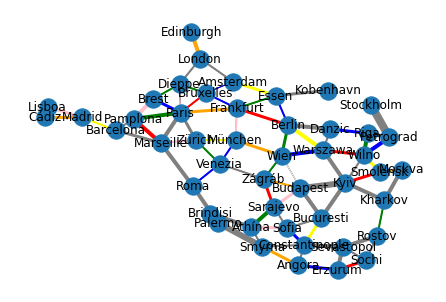

In [57]:
pos = nx.spring_layout(G, weight='Distance', scale=10, iterations=100)
nx.draw(G, pos)
nx.draw_networkx_edges(G, pos, width=weights, edge_color=colors)
nx.draw_networkx_labels(G, pos, labels=labels)
plt.show()